# 顔形状検出
## はじめに
gitには大きくて上げたくなかったので、このプログラムを実行する前に
% wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 ./data/

In [4]:
import sys
import os
import dlib
import glob
from skimage import io

from PIL import Image # 画像表示用
import matplotlib.pyplot as plt # 画像表示用
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("./data/shape_predictor_68_face_landmarks.dat")

Processing file: ./data/image3.jpg
Detection 0: Left: 465 Top: 446 Right: 501 Bottom: 482
Part 0: (466, 456), Part 1: (466, 461) ...
Detection 1: Left: 737 Top: 446 Right: 773 Bottom: 482
Part 0: (738, 469), Part 1: (740, 472) ...
Detection 2: Left: 305 Top: 470 Right: 341 Bottom: 506
Part 0: (309, 476), Part 1: (309, 480) ...
Detection 3: Left: 489 Top: 290 Right: 525 Bottom: 326
Part 0: (494, 301), Part 1: (494, 304) ...
Detection 4: Left: 193 Top: 386 Right: 229 Bottom: 422
Part 0: (193, 398), Part 1: (194, 402) ...
Detection 5: Left: 389 Top: 462 Right: 425 Bottom: 498
Part 0: (392, 472), Part 1: (391, 476) ...
Detection 6: Left: 657 Top: 310 Right: 693 Bottom: 346
Part 0: (662, 316), Part 1: (662, 320) ...
Detection 7: Left: 209 Top: 450 Right: 245 Bottom: 486
Part 0: (212, 462), Part 1: (212, 466) ...
Detection 8: Left: 609 Top: 382 Right: 645 Bottom: 418
Part 0: (612, 393), Part 1: (612, 397) ...
Detection 9: Left: 497 Top: 330 Right: 533 Bottom: 366
Part 0: (505, 350), Part 1: 

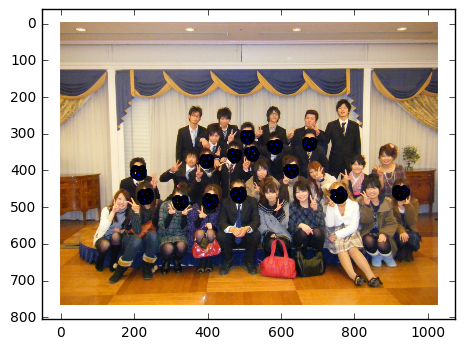

Processing file: ./data/image.jpg
Processing file: ./data/image2.jpg
Detection 0: Left: 94 Top: 136 Right: 280 Bottom: 322
Part 0: (111, 190), Part 1: (113, 215) ...


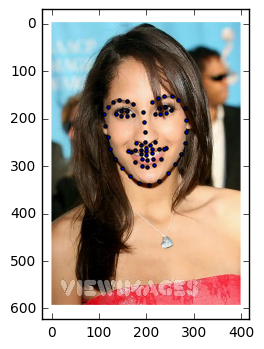

In [5]:
for f in glob.glob("./data/*.jpg"):
    print("Processing file: {}".format(f))
    img = io.imread(f)
    
    dets = detector(img, 1)
    for  k, d in enumerate(dets):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        # Get the landmarks/parts for the face in box d.
        shape = predictor(img, d)
        print("Part 0: {}, Part 1: {} ...".format(shape.part(0),
                                                  shape.part(1)))
        x = [point.x for point in shape.parts()]
        y = [point.y for point in shape.parts()]
        ax_img = plt.subplot(1, 1, 1)
        ax_img.imshow(img)
        plt.scatter(x, y, s=5, c='blue')

    plt.show()